In [2]:
# import lib
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 

from sklearn import preprocessing
#from sklearn.preprocessing import Imputer  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler


from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [3]:
# import ddata
df_train = pd.read_csv("E:/ML/AISS/patient_stay_2_1310/train_data.csv",index_col='patientid')
df_test = pd.read_csv("E:/ML/AISS/patient_stay_2_1310/test_data.csv",index_col='patientid')
#df.isnull().sum()

In [4]:
print(df_train.shape)
#df_train.head(3)

(318438, 17)


In [5]:
print(df_test.shape)
#df_test.head(3)

(137057, 16)


In [6]:
#Survived_train == Stay_train
stay_train = df_train.Stay
#print(stay_train)

In [7]:
X = df_train.drop("Stay", axis=1)
y = df_test
data = pd.concat([X,y])

In [8]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
patientid,,,,,,,,,,,,,,,,
31397,1,8,c,3,Z,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911.0
31397,2,2,c,5,Z,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954.0
31397,3,10,e,1,X,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745.0
31397,4,26,b,2,Y,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7272.0
31397,5,26,b,2,Y,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558.0


In [9]:
#print(data.dtypes)
print(data.shape)

(455495, 16)


In [10]:
# rename columns
original_col = data.columns
new_col = ['case_id','Hospital_code','Hospital_type_code','City_Code_Hospital','Hospital_region_code','Available_Extra_Rooms_in_Hospital','Department','Ward_Type','Ward_Facility_Code','Bed_Grade','City_Code_Patient','Type_of_Admission','Severity_of_Illness','Visitors_with_Patient','Age','Admission_Deposit']                                                                                                               
data =data.rename(columns=dict(zip(original_col, 
new_col)))
#data.head()
print(data.shape)
#print(data.head())

(455495, 16)


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 31397 to 126729
Data columns (total 16 columns):
case_id                              455495 non-null int64
Hospital_code                        455495 non-null int64
Hospital_type_code                   455495 non-null object
City_Code_Hospital                   455495 non-null int64
Hospital_region_code                 455495 non-null object
Available_Extra_Rooms_in_Hospital    455495 non-null int64
Department                           455495 non-null object
Ward_Type                            455495 non-null object
Ward_Facility_Code                   455495 non-null object
Bed_Grade                            455347 non-null float64
City_Code_Patient                    448806 non-null float64
Type_of_Admission                    455495 non-null object
Severity_of_Illness                  455495 non-null object
Visitors_with_Patient                455495 non-null int64
Age                                  455495 non-

In [12]:
# check missing values
data.isnull().sum()
#df.Hospital_code.count()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                             148
City_Code_Patient                    6689
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [13]:
#mode_bed_grade = data.Bed_Grade.mode()
#data.Bed_Grade = data.Bed_Grade.fillna(mode_bed_grade)


mode_bed_grade = data.Bed_Grade.mode()
data.Bed_Grade = data.Bed_Grade.fillna(2.0)
print(data.Bed_Grade.mode())

0    2.0
dtype: float64


In [14]:
mode_city_code_patient = data['City_Code_Patient'].mode()
# data.City_Code_Patient = data.City_Code_Patient.fillna(mode_city_code_patient)

print(data['City_Code_Patient'].mode())
data.City_Code_Patient = data.City_Code_Patient.fillna(8.0)

0    8.0
dtype: float64


In [15]:
#df.info()
data.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64

Missing values replaced by mode values in 

        Bed_Grade 
        City_Code_Patient 

In [16]:
#df['Bed_Grade'] = df['Bed_Grade'].replace(df['Bed_Grade'].mode(), "nan")
#df['City_Code_Patient'] = df['City_Code_Patient'].replace(df['City_Code_Patient'].mode(), "nan")

In [17]:
#pd.read_csv?
#df.head()
#df.plot?
data.shape
#Imputer?

(455495, 16)

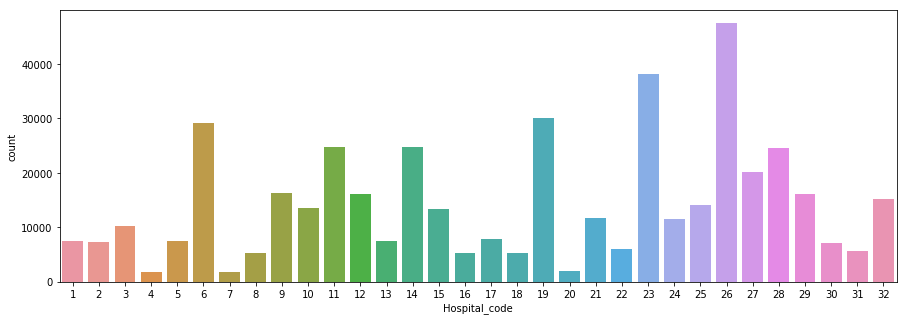

In [18]:
#sns.barplot?
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Hospital_code",ax=ax, data=data)

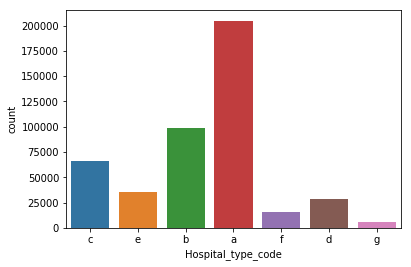

In [19]:
sns.countplot(x="Hospital_type_code", data=data)

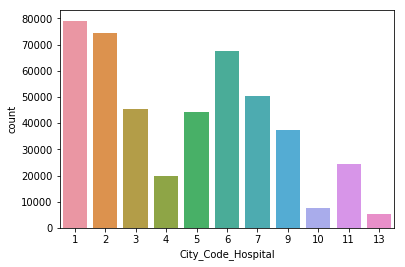

In [20]:

sns.countplot(x="City_Code_Hospital", data=data)

#sns.countplot(x="", data=df)
#sns.countplot(x="", data=df)

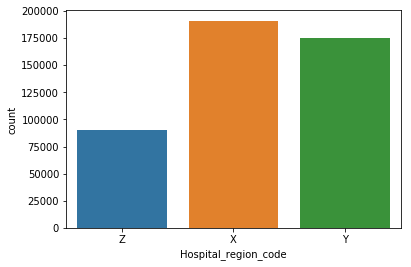

In [21]:
sns.countplot(x="Hospital_region_code", data=data)

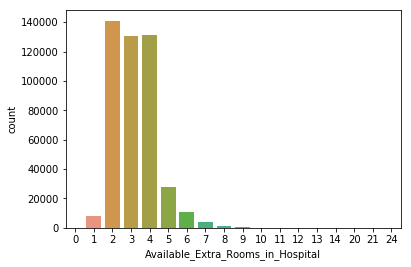

In [22]:
sns.countplot(x="Available_Extra_Rooms_in_Hospital", data=data)

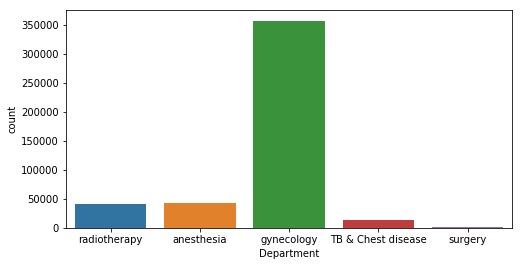

In [23]:
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Department",ax=ax, data=data)

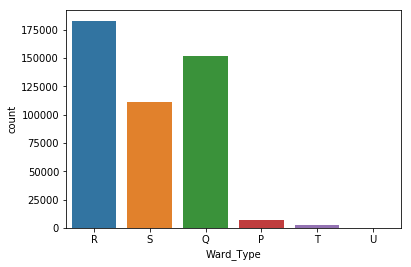

In [24]:
sns.countplot(x="Ward_Type", data=data)

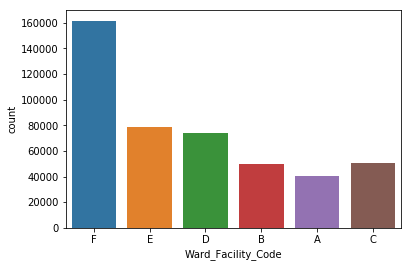

In [25]:
sns.countplot(x="Ward_Facility_Code", data=data)

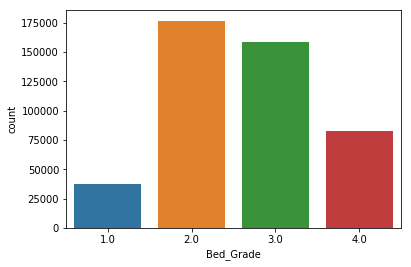

In [26]:
sns.countplot(x="Bed_Grade", data=data)

In [27]:
#sns.jointplot(x="case_id", y=y, data=data)
#data["case_id"].unique().count()
#sns.jointplot(x="patientid",y="Stay", data=data)


# storing unique value in a variable 
arr = data["case_id"].unique()   
# storing unique value in a variable 
unique_value = data["case_id"].nunique(dropna = True) 
print(len(arr), unique_value)

455495 455495


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 31397 to 126729
Data columns (total 16 columns):
case_id                              455495 non-null int64
Hospital_code                        455495 non-null int64
Hospital_type_code                   455495 non-null object
City_Code_Hospital                   455495 non-null int64
Hospital_region_code                 455495 non-null object
Available_Extra_Rooms_in_Hospital    455495 non-null int64
Department                           455495 non-null object
Ward_Type                            455495 non-null object
Ward_Facility_Code                   455495 non-null object
Bed_Grade                            455495 non-null float64
City_Code_Patient                    455495 non-null float64
Type_of_Admission                    455495 non-null object
Severity_of_Illness                  455495 non-null object
Visitors_with_Patient                455495 non-null int64
Age                                  455495 non-

455495
37


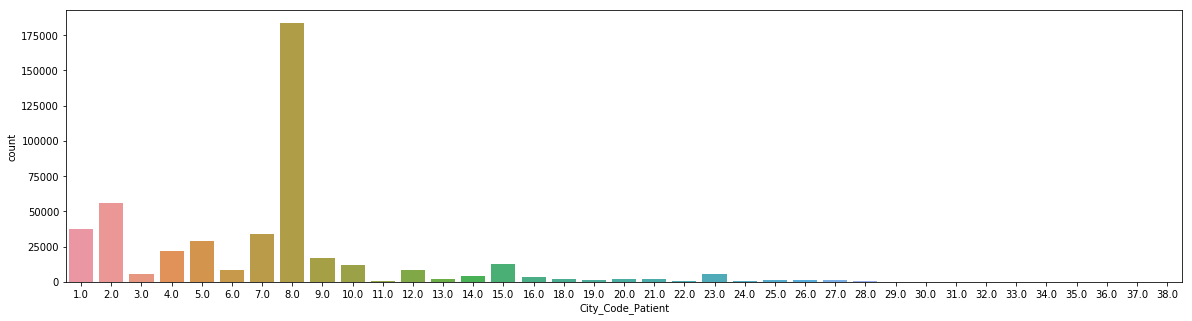

In [29]:
 fig_dims = (20, 5)
 fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x="City_Code_Patient",ax=ax, data=data)
print(data["City_Code_Patient"].count())
print(len(data["City_Code_Patient"].unique()))

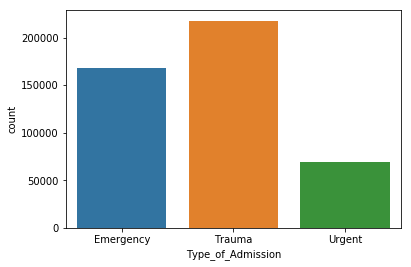

In [30]:
sns.countplot(x="Type_of_Admission", data=data)

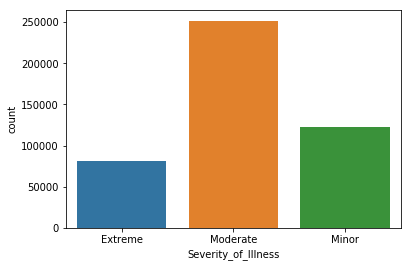

In [31]:
sns.countplot(x="Severity_of_Illness", data=data)

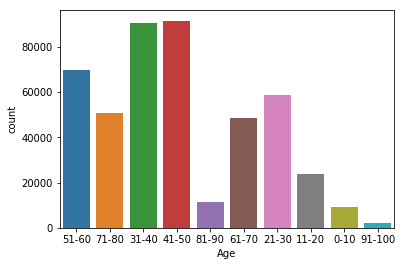

In [32]:
sns.countplot(x="Age", data=data)


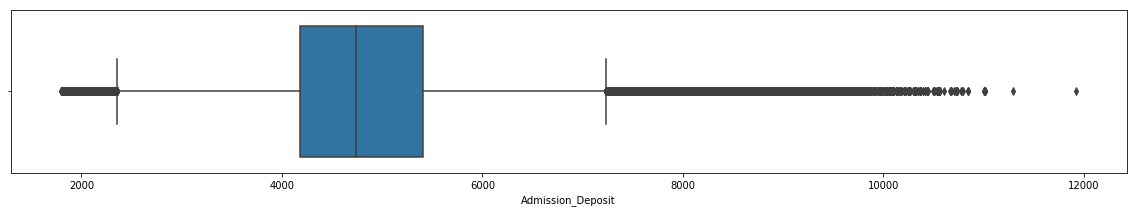

In [33]:
fig_dims = (20, 3)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="Admission_Deposit", ax=ax, data=data)
#sns.boxplot(x="Visitors_with_Patient", ax=ax, data=df)

In [34]:
# replace outliers by IQR

In [35]:
# replace outliers by IQR

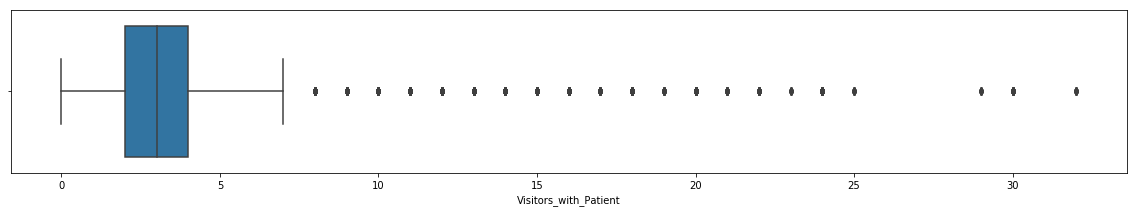

In [36]:
fig_dims = (20, 3)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="Visitors_with_Patient", ax=ax, data=data)

In [37]:
# replace outliers by IQR

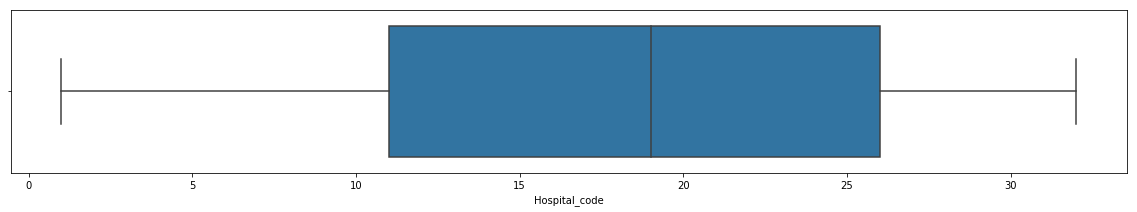

In [38]:
fig_dims = (20, 3)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="Hospital_code", ax=ax, data=data)

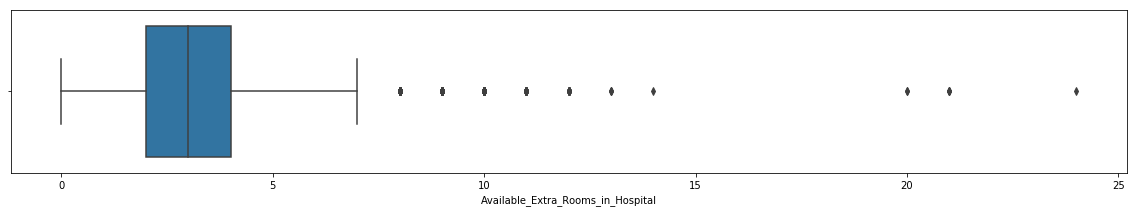

In [39]:
fig_dims = (20, 3)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="Available_Extra_Rooms_in_Hospital", ax=ax, data=data)

In [40]:
# replace outliers by IQR

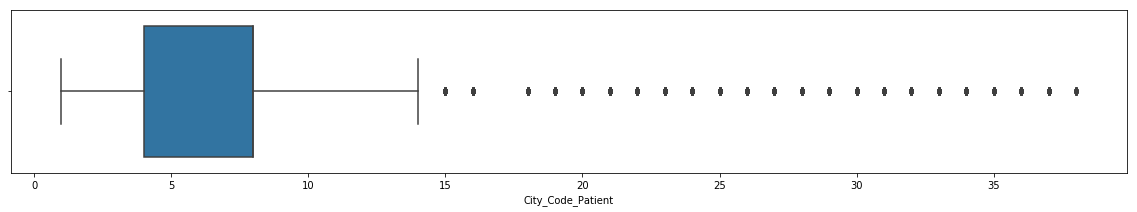

In [41]:
fig_dims = (20, 3)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="City_Code_Patient", ax=ax, data=data)

In [42]:
# replace outliers by IQR

In [43]:
#sns.countplot(x="", data=df)
#sns.boxplot?

Outliers present in 

        City_Code_Patient 
        Available_Extra_Rooms_in_Hospital 
        Hospital_code 
        Visitors_with_Patient

Replace outlier values by IQR

scaling

encoding

In [44]:
# t = df['Stay'].unique()
# t.sort()
# print("\nStay\n" , t)

# #classification problem

In [45]:
#df.shape
print(data.isnull().sum())
#df.head()
data.info()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 31397 to 126729
Data columns (total 16 columns):
case_id                              455495 non-null int64
Hospital_code                        455495 non-null int64
Hospital_type_code                   455495 non-null object
City_Code_Hospital                   455495 non-null int64
Hospital_re

In [46]:
#df.astype(int)
# converting 'Weight' from float to int 
#df['Bed_Grade'] = df['Bed_Grade'].astype(int) 

# converting 'Weight' and 'Salary' from float to int 
data = data.astype({"Admission_Deposit":'int', "City_Code_Patient":'int',"Bed_Grade":'int'})  
data.dtypes

case_id                               int64
Hospital_code                         int64
Hospital_type_code                   object
City_Code_Hospital                    int64
Hospital_region_code                 object
Available_Extra_Rooms_in_Hospital     int64
Department                           object
Ward_Type                            object
Ward_Facility_Code                   object
Bed_Grade                             int32
City_Code_Patient                     int32
Type_of_Admission                    object
Severity_of_Illness                  object
Visitors_with_Patient                 int64
Age                                  object
Admission_Deposit                     int32
dtype: object

In [47]:
#scaler = StandardScaler()
#scaled_df =scaler.fit_transform(df)

In [48]:
label_encoder = preprocessing.LabelEncoder()

In [49]:
# Encode labels in column 'Department'.
cid = data['case_id'].unique()
cid.sort()
print(cid)
data['case_id']= label_encoder.fit_transform(data['case_id']) 
data['case_id'].unique()


[     1      2      3 ... 455493 455494 455495]


array([     0,      1,      2, ..., 455492, 455493, 455494], dtype=int64)

In [50]:
#sns.lineplot(x="case_id", y="Stay", data=df)

In [51]:
# Encode labels in column 'Department'. 
print(data['Department'].unique())
data['Department']= label_encoder.fit_transform(data['Department']) 
data['Department'].unique()


['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']


array([3, 1, 2, 0, 4], dtype=int64)

In [52]:
print(data['Ward_Type'].unique())
data['Ward_Type']= label_encoder.fit_transform(data['Ward_Type']) 
data['Ward_Type'].unique()

['R' 'S' 'Q' 'P' 'T' 'U']


array([2, 3, 1, 0, 4, 5], dtype=int64)

In [53]:
print(data['Ward_Facility_Code'].unique())
data['Ward_Facility_Code']= label_encoder.fit_transform(data['Ward_Facility_Code']) 
data['Ward_Facility_Code'].unique()

['F' 'E' 'D' 'B' 'A' 'C']


array([5, 4, 3, 1, 0, 2], dtype=int64)

In [54]:
print(data['Type_of_Admission'].unique())
data['Type_of_Admission']= label_encoder.fit_transform(data['Type_of_Admission']) 
data['Type_of_Admission'].unique()

['Emergency' 'Trauma' 'Urgent']


array([0, 1, 2], dtype=int64)

In [55]:
print(data['Severity_of_Illness'].unique())
data['Severity_of_Illness']= label_encoder.fit_transform(data['Severity_of_Illness']) 
data['Severity_of_Illness'].unique()

['Extreme' 'Moderate' 'Minor']


array([0, 2, 1], dtype=int64)

In [56]:
print(data['Age'].unique())
data['Age']= label_encoder.fit_transform(data['Age']) 
data['Age'].unique()

['51-60' '71-80' '31-40' '41-50' '81-90' '61-70' '21-30' '11-20' '0-10'
 '91-100']


array([5, 7, 3, 4, 8, 6, 2, 1, 0, 9], dtype=int64)

In [57]:
# print(df_train['Stay'].unique())
# data['Stay']= label_encoder.fit_transform(data['Stay']) 
# data['Stay'].unique()

In [58]:
print(data['Hospital_type_code'].unique())
data['Hospital_type_code']= label_encoder.fit_transform(data['Hospital_type_code']) 
data['Hospital_type_code'].unique()

['c' 'e' 'b' 'a' 'f' 'd' 'g']


array([2, 4, 1, 0, 5, 3, 6], dtype=int64)

In [59]:
print(data['Hospital_region_code'].unique())
data['Hospital_region_code']= label_encoder.fit_transform(data['Hospital_region_code']) 
data['Hospital_region_code'].unique()

['Z' 'X' 'Y']


array([2, 0, 1], dtype=int64)

In [60]:
print(data['Bed_Grade'].unique())
data['Bed_Grade']= label_encoder.fit_transform(data['Bed_Grade']) 
data['Bed_Grade'].unique()

#df['']= label_encoder.fit_transform(df['']) 
#df[''].unique()

[2 3 4 1]


array([1, 2, 3, 0], dtype=int64)

In [61]:
data['case_id']= label_encoder.fit_transform(data['case_id']) 
data['case_id'].unique()

array([     0,      1,      2, ..., 455492, 455493, 455494], dtype=int64)

In [62]:
data['City_Code_Hospital']= label_encoder.fit_transform(data['City_Code_Hospital']) 
data['City_Code_Hospital'].unique()

array([ 2,  4,  0,  1,  5,  7,  8,  3,  9,  6, 10], dtype=int64)

In [63]:
#print(df['Admission_Deposit'].unique())
#df['Admission_Deposit']= label_encoder.fit_transform(df['Admission_Deposit']) 
#df['Admission_Deposit'].unique()

In [64]:
print(data['City_Code_Patient'].unique())
data['City_Code_Patient']= label_encoder.fit_transform(data['City_Code_Patient']) 
data['City_Code_Patient'].unique()

[ 7  8  2  5  6  3  4  1  9 14 25 15 12 10 28 24 23 20 11 13 21 18 16 26
 27 22 19 31 34 32 30 29 37 33 35 36 38]


array([ 6,  7,  1,  4,  5,  2,  3,  0,  8, 13, 23, 14, 11,  9, 26, 22, 21,
       18, 10, 12, 19, 16, 15, 24, 25, 20, 17, 29, 32, 30, 28, 27, 35, 31,
       33, 34, 36], dtype=int64)

In [65]:
hc = data['Hospital_code'].unique()
hc.sort()
print(hc)
data['Hospital_code']= label_encoder.fit_transform(data['Hospital_code']) 
data['Hospital_code'].unique()

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]


array([ 7,  1,  9, 25, 22, 31,  0, 21, 15,  8,  5, 28, 11,  2, 20, 27, 26,
       18,  4, 13, 12, 30, 23, 16, 24, 14, 10, 29, 17,  3,  6, 19],
      dtype=int64)

In [66]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit
patientid,,,,,,,,,,,,,,,,
31397,0,7,2,2,2,3,3,2,5,1,6,0,0,2,5,4911
31397,1,1,2,4,2,2,3,3,5,1,6,1,0,2,5,5954
31397,2,9,4,0,0,2,1,3,4,1,6,1,0,2,5,4745
31397,3,25,1,1,1,2,3,2,3,1,6,1,0,2,5,7272
31397,4,25,1,1,1,2,3,3,3,1,6,1,0,2,5,5558


In [67]:
data.describe()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit
count,455495.00000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000
mean,227747.00000,17.326335,1.256501,3.592349,0.778461,3.196140,1.944024,1.888087,3.286956,1.628215,6.217862,0.782867,1.374033,3.284229,4.126757,4877.434022
std,131490.22477,8.634036,1.532773,2.806344,0.753238,1.166994,0.561536,0.804688,1.689726,0.871929,4.586532,0.689184,0.768535,1.768044,1.889698,1084.982089
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1800.000000
25%,113873.50000,10.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,0.000000,1.000000,2.000000,3.000000,4184.000000
50%,227747.00000,18.000000,1.000000,4.000000,1.000000,3.000000,2.000000,2.000000,4.000000,2.000000,7.000000,1.000000,2.000000,3.000000,4.000000,4738.000000
75%,341620.50000,25.000000,2.000000,6.000000,1.000000,4.000000,2.000000,2.000000,5.000000,2.000000,7.000000,1.000000,2.000000,4.000000,5.000000,5405.000000
max,455494.00000,31.000000,6.000000,10.000000,2.000000,24.000000,4.000000,5.000000,5.000000,3.000000,36.000000,2.000000,2.000000,32.000000,9.000000,11920.000000


In [68]:
data.shape

(455495, 16)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 31397 to 126729
Data columns (total 16 columns):
case_id                              455495 non-null int64
Hospital_code                        455495 non-null int64
Hospital_type_code                   455495 non-null int32
City_Code_Hospital                   455495 non-null int64
Hospital_region_code                 455495 non-null int32
Available_Extra_Rooms_in_Hospital    455495 non-null int64
Department                           455495 non-null int32
Ward_Type                            455495 non-null int32
Ward_Facility_Code                   455495 non-null int32
Bed_Grade                            455495 non-null int64
City_Code_Patient                    455495 non-null int64
Type_of_Admission                    455495 non-null int32
Severity_of_Illness                  455495 non-null int32
Visitors_with_Patient                455495 non-null int64
Age                                  455495 non-null int32


Missing Values in 

        Bed Grade        
        City_Code_Patient
        

### preprocessing of df (train_data) ends here

In [70]:
data_train = data.iloc[:318438]
data_test = data.iloc[318438:]

In [71]:
# X = data_train.values
# test = data_test.values to find y_pred
# y = survived_train.values

X = data_train.values
test = data_test.values
y = stay_train.values

In [72]:
# Instantiate model and fit to data
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [73]:
# Make predictions and store in 'Survived' column of df_test
Y_pred = clf.predict(test)
df_test['Stay'] = Y_pred

noww y_test is ready

In [74]:
print(df_train.shape)
print(df_test.shape)

(318438, 17)
(137057, 17)


In [75]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [76]:
clf = tree.DecisionTreeClassifier(max_depth=3)

    # Fit the classifier to the training data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [77]:
# calculate accuracy

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


print("\n\nConfusion Matrix: \n\n", confusion_matrix(y_test, y_pred))
print ("\n\nAccuracy : \n\n", accuracy_score(y_test,y_pred)*100)
print("\n\nReport : \n\n", classification_report(y_test, y_pred))



Confusion Matrix: 

 [[    0  3337  4421     0     0    93     0     0     0     0     0]
 [    0 12038 11713     0     0  1941     0     0     0     0     3]
 [    0 10160 17849     0     0   920     0     0     0     0    65]
 [    0  4495  6851     0     0  6668     0     0     0     0    99]
 [    0  1245  2056     0     0   496     0     0     0     0    49]
 [    0  1206  2114     0     0  8008     0     0     0     0   333]
 [    0   233   396     0     0   238     0     0     0     0    42]
 [    0   290   539     0     0  2214     0     0     0     0   298]
 [    0    77    91     0     0  1155     0     0     0     0   271]
 [    0    67   139     0     0   561     0     0     0     0   134]
 [    0   152   146     0     0  1024     0     0     0     0   858]]


Accuracy : 

 36.87776561830899


c:\users\sheetal\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Report : 

                     precision    recall  f1-score   support

              0-10       0.00      0.00      0.00      7851
             11-20       0.36      0.47      0.41     25695
             21-30       0.39      0.62      0.47     28994
             31-40       0.00      0.00      0.00     18113
             41-50       0.00      0.00      0.00      3846
             51-60       0.34      0.69      0.46     11661
             61-70       0.00      0.00      0.00       909
             71-80       0.00      0.00      0.00      3341
             81-90       0.00      0.00      0.00      1594
            91-100       0.00      0.00      0.00       901
More than 100 Days       0.40      0.39      0.40      2180

          accuracy                           0.37    105085
         macro avg       0.14      0.20      0.16    105085
      weighted avg       0.24      0.37      0.29    105085

